In [115]:
#!/usr/bin/python
#import libararies

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pprint
from feature_format import featureFormat, targetFeatureSplit

sys.path.append("D:/Desktop/WGU Projects/data_analyst_nanodegree/machine_learning/ud120-projects-master/tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


In [116]:
# Load the dictionary containing the dataset
with open("D:/Desktop/WGU Projects/data_analyst_nanodegree/machine_learning/ud120-projects-master/final_project/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
my_dataset = data_dict

features_list = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person',
       'from_this_person_to_poi', 'loan_advances', 'long_term_incentive',
       'other', 'restricted_stock', 'restricted_stock_deferred',
       'salary', 'shared_receipt_with_poi', 'to_messages',
       'total_payments', 'total_stock_value']


### Exploring the dataset

In [117]:
#Wanted to explore using pandas
import pandas as pd

enron_df = pd.DataFrame(data_dict)
enron_df = enron_df.T
enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


I quickly notice Negative numbers and a lot of NaN's.  I also notice 'TOTAL' and 'The Travel in the park' rows.  

In [118]:
enron_df.shape

(146, 21)

146 people and 21 features

In [119]:
#List of the 21 features

enron_df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

In [120]:
# How many POI's are there?

count = 0
for person_name in my_dataset:
    if my_dataset[person_name]["poi"] == True:
        count+=1
print count

18


In [22]:
#List of the POI's

for person_name in my_dataset:
    if my_dataset[person_name]["poi"] == True:
        print [person_name]

['HANNON KEVIN P']
['COLWELL WESLEY']
['RIEKER PAULA H']
['KOPPER MICHAEL J']
['SHELBY REX']
['DELAINEY DAVID W']
['LAY KENNETH L']
['BOWEN JR RAYMOND M']
['BELDEN TIMOTHY N']
['FASTOW ANDREW S']
['CALGER CHRISTOPHER F']
['RICE KENNETH D']
['SKILLING JEFFREY K']
['YEAGER F SCOTT']
['HIRKO JOSEPH']
['KOENIG MARK E']
['CAUSEY RICHARD A']
['GLISAN JR BEN F']


In [121]:
# Want to see how many features have Negatives and Nan's
# Count how many Negatives and Nan's by feature.

def neg_nan_count(my_dataset):
    nan_feature = dict((key, 0) for key, value in my_dataset['METTS MARK'].iteritems())
    negative_feature = dict((key, 0) for key, value in my_dataset['METTS MARK'].iteritems())
    for person in my_dataset:
        for key, value in my_dataset[person].iteritems():
            if value == "NaN":
                nan_feature[key] += 1
            elif value < 0:
                negative_feature[key] += 1
    return nan_feature, negative_feature

In [122]:
nan_feature, negative_feature = neg_nan_count(my_dataset)

print "Count of NaNs by Feature:"          
pp.pprint(nan_feature)
print
print "Count of Negatives by Feature"
pp.pprint(negative_feature)

Count of NaNs by Feature:
{   'bonus': 64,
    'deferral_payments': 107,
    'deferred_income': 97,
    'director_fees': 129,
    'email_address': 35,
    'exercised_stock_options': 44,
    'expenses': 51,
    'from_messages': 60,
    'from_poi_to_this_person': 60,
    'from_this_person_to_poi': 60,
    'loan_advances': 142,
    'long_term_incentive': 80,
    'other': 53,
    'poi': 0,
    'restricted_stock': 36,
    'restricted_stock_deferred': 128,
    'salary': 51,
    'shared_receipt_with_poi': 60,
    'to_messages': 60,
    'total_payments': 21,
    'total_stock_value': 20}

Count of Negatives by Feature
{   'bonus': 0,
    'deferral_payments': 1,
    'deferred_income': 49,
    'director_fees': 0,
    'email_address': 0,
    'exercised_stock_options': 0,
    'expenses': 0,
    'from_messages': 0,
    'from_poi_to_this_person': 0,
    'from_this_person_to_poi': 0,
    'loan_advances': 0,
    'long_term_incentive': 0,
    'other': 0,
    'poi': 0,
    'restricted_stock': 1,
    'res

In [123]:
# Above,'deferral_payments' has 1 negative
# Looking to see what that is

for person in data_dict:
    if data_dict[person]['deferral_payments'] < 0:
        print data_dict[person]['deferral_payments']
        print person

-102500
BELFER ROBERT


Looking at the pdf.  Deferred Income is $102,500.  Looking at the data, it looks like data for Belfer got misaligned or something.  The further I look I see this happening on several occasions, so this is something I need to fix.

In [124]:
# Correcting the data for Belfer, according to the pdf

data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['deferral_payments'] = 'NaN'
data_dict['BELFER ROBERT']['expenses'] = 3285 
data_dict['BELFER ROBERT']['total_payments'] = 102500
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['total_stock_value'] = "NaN"

In [29]:
#Exploring the other negative value in 'restricted stock'

for person in data_dict:
    if data_dict[person]['restricted_stock'] < 0:
        print data_dict[person]['restricted_stock']
        print person

-2604490
BHATNAGAR SANJAY


In [125]:
# Correcting the data for Belfer, according to the pdf

data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290
data_dict['BHATNAGAR SANJAY']['total_payments'] = 137864
data_dict['BHATNAGAR SANJAY']['other'] = 'NaN'

In [126]:
#Check 'deferred_payments' and restricted_stock' to make sure the negatives have been fixed.

nan_feature, negative_feature = neg_nan_count(my_dataset)

print "Count of Negatives by Feature"
pp.pprint(negative_feature)

Count of Negatives by Feature
{   'bonus': 0,
    'deferral_payments': 0,
    'deferred_income': 50,
    'director_fees': 0,
    'email_address': 0,
    'exercised_stock_options': 0,
    'expenses': 0,
    'from_messages': 0,
    'from_poi_to_this_person': 0,
    'from_this_person_to_poi': 0,
    'loan_advances': 0,
    'long_term_incentive': 0,
    'other': 0,
    'poi': 0,
    'restricted_stock': 0,
    'restricted_stock_deferred': 18,
    'salary': 0,
    'shared_receipt_with_poi': 0,
    'to_messages': 0,
    'total_payments': 0,
    'total_stock_value': 0}


### Checking Outliers

Text(0,0.5,'bonus')

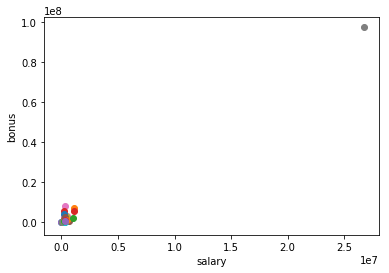

In [127]:
#Plotting Bonus vs Salary, Checking for the outliers

features = ["salary", "bonus"]

data = featureFormat(my_dataset, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [132]:
### Removed 'Total' and also removed "The travel agency in the park' I noticed above"

my_dataset.pop('TOTAL')
my_dataset.pop("THE TRAVEL AGENCY IN THE PARK")



{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [133]:
# Exploring Bonus Outliers

from pprint import pprint
bonus_outliers = []
for key in my_dataset:
    val = my_dataset[key]['bonus']
    if val == 'NaN':
        continue
    bonus_outliers.append((key,int(val)))

pprint(sorted(bonus_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 8000000), ('LAY KENNETH L', 7000000)]


In [134]:
# Exploring Salary Outliers

salary_outliers = []
for key in my_dataset:
    val = my_dataset[key]['salary']
    if val == 'NaN':
        continue
    salary_outliers.append((key,int(val)))

pprint(sorted(salary_outliers,key=lambda x:x[1],reverse=True)[:2])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]


609.0


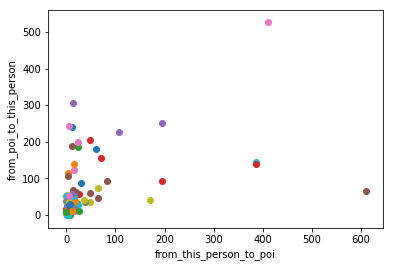

In [99]:
#Plotting from person to POI vs. from POI to person, Checking for the outliers
import matplotlib.pyplot

features = ["from_this_person_to_poi", "from_poi_to_this_person"]
data = featureFormat(my_dataset, features)


### your code below
print data.max()
for point in data:
    from_this_person_to_poi = point[0]
    from_poi_to_this_person = point[1]
    matplotlib.pyplot.scatter( from_this_person_to_poi, from_poi_to_this_person )

matplotlib.pyplot.xlabel("from_this_person_to_poi")
matplotlib.pyplot.ylabel("from_poi_to_this_person")
matplotlib.pyplot.show()

In [135]:
#To POI outliers

to_poi_outliers = []
for key in my_dataset:
    val = my_dataset[key]['from_this_person_to_poi']
    if val == 'NaN':
        continue
    to_poi_outliers.append((key,int(val)))

pprint(sorted(to_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('DELAINEY DAVID W', 609), ('LAVORATO JOHN J', 411)]


In [136]:
#From POI to Outliers

from_poi_outliers = []
for key in my_dataset:
    val = my_dataset[key]['from_poi_to_this_person']
    if val == 'NaN':
        continue
    from_poi_outliers.append((key,int(val)))

pprint(sorted(from_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 528), ('DIETRICH JANET R', 305)]


### Create New Features

In [137]:
# Create new feature
# Creating a ratio for 'from_poi_to_this_person' and 'from_this_person_to_poi'

def create_ratio(my_dataset, ratio_name, numerator, denominator):
    for person in my_dataset:
        if my_dataset[person][numerator] == 'NaN' or my_dataset[person][denominator] == 'NaN':
                my_dataset[person][ratio_name] = 'NaN'
        else:
            my_dataset[person][ratio_name] = float(my_dataset[person][numerator])/float(my_dataset[person][denominator])
    return my_dataset

In [138]:
my_dataset = create_ratio(my_dataset, 'from_poi_ratio', 'from_poi_to_this_person', 'to_messages' )
my_dataset = create_ratio(my_dataset, 'to_poi_ratio', 'from_this_person_to_poi', 'from_messages' )

In [139]:
features_list.append('from_poi_ratio')
features_list.append('to_poi_ratio')

In [140]:
enron_df = pd.DataFrame(data_dict)
enron_df = enron_df.T
enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_ratio,from_poi_to_this_person,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,to_poi_ratio,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,0.0161957,47,...,152,False,126027,-126027,201955,1407,2902,0.0296128,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,0.0689046,39,...,864523,False,1757552,-560222,477,465,566,0,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,69,False,145796,-82782,239671,NaN,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,874,False,NaN,NaN,80818,NaN,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,0.0196856,144,...,566,False,126027,NaN,231330,2639,7315,0.0888787,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,0.0285321,228,...,210698,True,157569,NaN,213999,5521,7991,0.22314,5501630,1110705
BELFER ROBERT,NaN,NaN,-102500,102500,NaN,3285,3285,NaN,NaN,NaN,...,NaN,False,44093,-44093,NaN,NaN,NaN,NaN,102500,NaN
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,False,869220,NaN,216582,NaN,NaN,NaN,228474,2493616


In [164]:
# Decided to use Decision Tree to rank the features.  
# Removed from features_list: 'email', 'from_poi_to_this_person', 'from_this_person_to_poi'
# Feature Selection - Round 1

from time import time

features_list = ['poi', 'salary', 'bonus', 'from_poi_ratio', 'to_poi_ratio', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                 'exercised_stock_options', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 
                 'director_fees']

data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.6
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.258646616541)
2 feature bonus (0.212466650497)
3 feature from_poi_ratio (0.197778963276)
4 feature to_poi_ratio (0.149133225481)
5 feature deferral_payments (0.0950906678461)
6 feature total_payments (0.0721804511278)
7 feature loan_advances (0.0147034252297)
8 feature restricted_stock_deferred (0.0)
9 feature deferred_income (0.0)
10 feature total_stock_value (0.0)
11 feature expenses (0.0)
12 feature exercised_stock_options (0.0)
13 feature long_term_incentive (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)


In [165]:
#Feature Selection - Round 2
# Kept only the top 10 from the list above 

from time import time
features_list = ['poi', 'salary', 'bonus', 'from_poi_ratio', 'to_poi_ratio', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value']

data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.7333333333333333
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.248383097645)
2 feature bonus (0.215475551886)
3 feature from_poi_ratio (0.158041682347)
4 feature to_poi_ratio (0.149454462034)
5 feature deferral_payments (0.0999902353286)
6 feature total_payments (0.0685045948204)
7 feature loan_advances (0.0601503759398)
8 feature restricted_stock_deferred (0.0)
9 feature deferred_income (0.0)
10 feature total_stock_value (0.0)


In [166]:
#Feature Selection - Round 3
# Removed the created features features out of curiosity

from time import time
features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value']

data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(8):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.7333333333333333
Decision tree algorithm time: 0.003 s
Feature Ranking: 
1 feature salary (0.365677801192)
2 feature bonus (0.210265405818)
3 feature deferral_payments (0.19722995884)
4 feature total_payments (0.176701520867)
5 feature loan_advances (0.0401002506266)
6 feature restricted_stock_deferred (0.0100250626566)
7 feature deferred_income (0.0)
8 feature total_stock_value (0.0)


In [167]:
#Feature Selection - Round 4
# Kept only the top 5 from the list above 

from time import time
features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'total_payments', 'loan_advances']

data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(5):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.8461538461538461
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.463061871639)
2 feature bonus (0.247894503546)
3 feature deferral_payments (0.218718338399)
4 feature total_payments (0.0703252864157)
5 feature loan_advances (0.0)


Going to use the following features list because of the 93% accuracy from decision tree

features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'total_payments', 
                 'loan_advances']


### Try a varity of classifiers

In [181]:
### Extract features and labels from dataset for local testing
features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value']

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [182]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Naive Bayes Accuracy :", accuracy
print "training time:", round(time()-t0, 3), "s"
print
report = classification_report(labels_test, pred)
print report

Naive Bayes Accuracy : 0.9302325581395349
training time: 0.003 s

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        38
         1.0       0.75      0.60      0.67         5

   micro avg       0.93      0.93      0.93        43
   macro avg       0.85      0.79      0.81        43
weighted avg       0.93      0.93      0.93        43



In [186]:
#Decision Tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Decision Tree Accuracy :", accuracy
print "training time:", round(time()-t0, 2), "s"
print 'Precision :', precision
print 'Recall :', recall
print
report = classification_report(labels_test, pred)
print report

Decision Tree Accuracy : 0.813953488372093
training time: 170.56 s
Precision : 0.2
Recall : 0.2

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.20      0.20      0.20         5

   micro avg       0.81      0.81      0.81        43
   macro avg       0.55      0.55      0.55        43
weighted avg       0.81      0.81      0.81        43



In [180]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "AdaBoost Accuracy :", accuracy
print "training time:", round(time()-t0, 3), "s"
print 'Precision :', precision
print 'Recall :', recall
print
report = classification_report(labels_test, pred)
print report

AdaBoost Accuracy : 0.8620689655172413
training time: 13.725 s
Precision : 0.0
Recall : 0.0

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        27
         1.0       0.00      0.00      0.00         2

   micro avg       0.86      0.86      0.86        29
   macro avg       0.46      0.46      0.46        29
weighted avg       0.86      0.86      0.86        29

